# Fundementals of Data Analysis Practical Assignment - Anscombe's Quartet

## 1.0 Background of the Dataset

### 1.1. Who created the dataset?

![Frank Anscombe](http://www.webcitation.org/getfile.php?fileid=25f1b121ddd81fe1719b9e155d8866a45f89f72f)

Anscombe's Quartet was created by Francis (Frank) Anscombe, an English statistician who recieved a first class honours degree and master's in mathermatics from Cambridge University where he went on to lecture at. He later moved to Princeton University and then became the founding chairman of the statistics department at Yale University which he headed for six years. During World War 2 he worked on mathematical aspects of firing rockets which was used to calculate firing solution for rockets on D-Day. See https://www.webcitation.org/6OUhHPyy3?url=http://www.yale.edu/opa/arc-ybc/v30.n9/story11.html

He was a pioneer in the application of computers to the statistical analysis of data, and argued persuasively that residuals (the difference between the observed dependant variable and predicted variable) be examined to diagnose the applicability of a postulated model in linear regression.

Anscombe argued for the importance of graphing data rather than solely relying on numerical statistics when analysing data and that "a computer should make both calculations and graphs". Calculations may be misleading and graphs should be used check whether assumptions based on such calculations are reasonably correct. He created the dataset we are examing in this project in order to demonstrate this.

### 1.2. When was it created?

The dataset was first published in 1973 in the journal "The American Statistician" as part of an article titled "Graphs in Statistical Analysis" available here: http://ww.w.lithoguru.com/scientist/statistics/Anscombe_Graphs%20in%20Statistical%20Analysis_1973.pdf

### 1.3. Speculation on the origins of the dataset

I could not find any good sources of speculation on where the dataset came from or how it was created. From my own research I have developed two possible theories:

**1. Public School Expenditure**

Anscombe mentions a yet to be published paper on per capita expenditure on public schools in each of the 50 US states and Washington DC. He states in the article that "Expenditure had a satisfactory linear regression on three likely predictor variables". He goes on to note that Alaska was an outlier that contributed heavily to the regression relation. He also notes that several other states were extraordinary. It might be that seeing this data inspired Anscombe to create data along the same lines or he may have repurposed some of this data for his dataset.

**2. Genetic Statistics**

Anscombe spent two years working in the Rothamstead Research which is an agricultural research institution. It was a major centre for research in statistics and genetics counting Ronald Fisher (of Iris Dataset fame) as another alumnus. Anscombe might have been inspired by Fisher to create a dataset based on biological data. For example, a more recent 2007 article from The American Statistician titled *"Generating Data with Identical Statistics but Dissimilar Graphics - A Follow up to the Anscombe Dataset"* (available here: https://www.scribd.com/document/10158752/More-on-Anscombe-Datasets) demonstrates how to create datasets with similar descriptive statistics but different appearances when visualised by using a "genetic algorithm". It might be that Anscombe used a similar procedure.

## 2.0 Calculating the Descriptive Statistics

While I am aware that the assignment's Problem Statement asks that we plot the data first and then calculate the descriptive statistics, I thought it my be more interesting to get the descriptive statistics first and demonstrate how we can be lead astray before showing how the data appears when charted.

Anscombe's Quartet was shown in the below format in the original 1973 article: 

![alt text](https://github.com/ConorHogan/FODA-Practical-Assignment/blob/master/FODA-Images/Anscombeoriginal.PNG "Original Dataset")

The "x" values for the first three datasets were identical with the "y" values differing. The fourth subset has a unique set of "x" and "y" values.

Conveniently, the Python graphing package Seaborn has Anscombes Quartet in it's library of datasets by default, which means we don't have to search for a CSV version or create one ourselves.

I will first look at the dataset as a whole before calculating the descriptive statistics for the four subsets of the data.

### 2.1. Descriptive Statistics for the Combined Dataset 

Before beginning I will import the Python packages I will need for this assignment.

In [1]:
import seaborn as sns # Data visualisation tool that comes with a copy of the dataset in it's library and regression plots
import pandas as pd # Tool for manipulating the dataset and creating subsets
import matplotlib.pyplot as plt # The basic Python graphing tool that Seaborn is built upon
import numpy as np # For use in shuffling / randomizing data and generating normal distribution graph
import scipy.stats as stats # Used for calculating the normal distribution by getting mean and std for x and y values
from sklearn import linear_model # Used for performing linear regression on the combined dataset along with Seaborn

Then we can load the "anscombe" dataset from Seaborn. The dataset is saved as a Pandas dataframe by default. 

In [2]:
# Load the example dataset for Anscombe's quartet
anscombedf = sns.load_dataset("anscombe")

print(anscombedf)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

As we can see the dataframe is in a different format to Anscombe's original. It has been transposed in the three columns with the first columns' values showing the 4 subsets followed by the "x" and "y" values.

#### 2.1.1. Descriptive Statistics

**Pandas df.Describe**

We can get several descriptive statistics for the dataset by using Pandas "describe" function.

In [3]:
anscombedf.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


The above table tells us:
* There are 44 "x" values and 44 "y" values.
* The mean (average) of the "x" values is 9 and the mean of the "y" values is 7.5.
* The standard deviation is 3.20 for "x" and 1.96 for "y".
    * We will use the standard deviation and mean to show that the data is normally distributed later.
* The lowest values for "x" and "y" are 4.00 and 3.10 respectively.
* The max values for "x" and "y" are 19.00 and 12.74 respectively.
* The percentile values are also close to the mean indicating a normal distribution

**Mode**

In [4]:
anscombedf.mode(axis=0)

,dataset,x,y
0,I,8.0,8.84
1,II,NaN,NaN
2,III,NaN,NaN
3,IV,NaN,NaN


Pandas' "Mode" function calculates the mode for each column in the dataframe. 8 is the most common "x" value thanks to subset IV. 8.84 is the most common "y" value as it is the only value that appears more than once.

**Median**

In [5]:
anscombedf.median()

x    8.00
y    7.52
dtype: float64

Pandas' median value returns the midpoint value for "x" and "y" which is 8 and 7.52 respectively. As these values are almost identical to the mean in both cases, you would not expect the presence of any outliers.

**Kurtosis**

In [6]:
anscombedf.kurtosis()

x    0.835279
y    0.908602
dtype: float64

Values are relatively close to zero which would again give the impression that there are no outliers.

**Skewness**

In [7]:
anscombedf.skew()

x    0.736875
y    0.439346
dtype: float64

Similar to the kurtosis values above, both values are relatively close to zero meaning that data should be fairly symetrical when graphed. The "x" values are moderately skewed, but not by enough to raise any alarm bells (until we graph the data).

**Corrolation**

In [8]:
anscombedf.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


Pandas' df.corr function give the Pearson corrolation coefficient for each "x" and "y". The corrolation coeficient of 0.82 normally indicates that the values have a strong positive linear relationship, meaning that as one increases the other should increase at the same rate. We can see this repeated in the linear regression results below.

####  2.1.2. Normal Distribution and skew

Charting the datasets normal distribution using the combined data's standard deviation and mean shows a normal distribution.

**Distribution graph for X**

X MEAN: 9.0 X STD: 3.1622776601683795


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


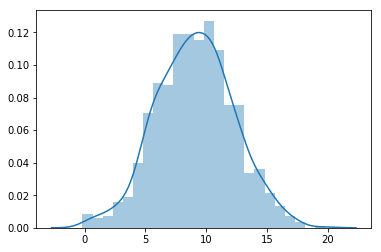

In [9]:
"""I could have used the mean and standard deviation from the df.describe results above, but I wanted to try and new method."""

from scipy.stats import norm 

norm_X= anscombedf["x"].values # convert to numpy array using np.values
mux, stdx = norm.fit(norm_X) # norm.fit returns the mean and standard deviation to create the normal distribution
print("X MEAN:",mux ,"X STD:",stdx)

x = np.random.normal(mux, stdx, 1000)
sns.distplot(x, hist=True)


**Distribution Graph for Y**

Y MEAN: 7.500681818181818 Y STD: 1.9365367373545919


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


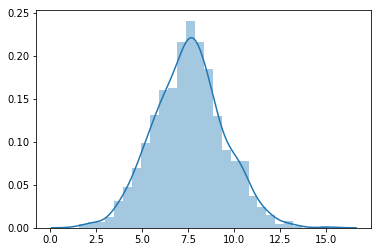

In [10]:
norm_Y = anscombedf["y"].values
muy, stdy = norm.fit(norm_Y) 
print("Y MEAN:",muy ,"Y STD:",stdy)

x = np.random.normal(muy, stdy, 1000)
sns.distplot(x, hist=True)

**Skew for X and Y**

Our first evidence of something odd in the dataset comes if we look at the skew of the distribution for X and Y. While the descriptive description calculations above showed X to be moderately positively skewed, it appears much more pronounced when graphed. Normally this would indicate the presence of a few values that are high above the mean. As we will see later this is actually down to the mean being pushed to the left due the cluster of x values in subset "IV" of the data, although there is one rouge outlier in also in that subset.

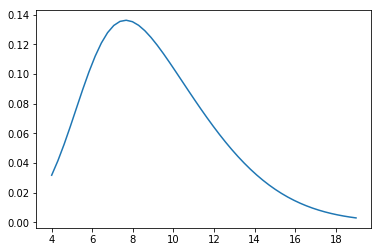

In [11]:
# code taken from https://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy
from scipy.stats import skewnorm
skewX = np.linspace(min(norm_X), max(norm_X)) # returns evenly spaced values over the range of values in x
plt.plot(skewX, skewnorm.pdf(skewX, *skewnorm.fit(norm_X))) # 

The skew for the distribution of the Y values in much less pronounced, again giving the impression that there are no outliers.

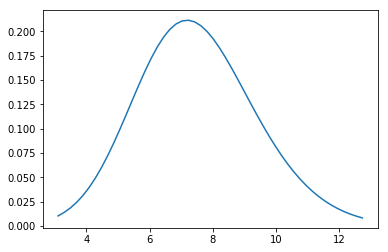

In [12]:
from scipy.stats import skewnorm
skewY = np.linspace(min(norm_Y), max(norm_Y))
plt.plot(skewY, skewnorm.pdf(skewY, *skewnorm.fit(norm_Y)))

#### 2.1.3. Performing linear regression on dataset.

Our initial descriptive statistics calculations also showed that there was a strong positive corrolation between "x" and "y" in the dataset. We can investigate further to see if this is true by charting regression line. 

**Note:** In the below example I have omitted the accompanying scatter plot to maintain the illusion that we are fumbling through this only hitting on the examples that could lead us astray.

Below I am using Scikit-learns linear regression model. This requires that you train the model first, so I started by shuffling the data to randomise it and then training using a sample of half of the data.

In [13]:
#shuffle dataset before training
shuffled_df = anscombedf.iloc[np.random.permutation(len(anscombedf))]
shuffled_df

,dataset,x,y
13,II,13.0,8.74
36,IV,8.0,8.84
23,III,8.0,6.77
40,IV,19.0,12.50
2,I,13.0,7.58
19,II,12.0,9.13
3,I,9.0,8.81
39,IV,8.0,5.25
7,I,4.0,4.26
37,IV,8.0,8.47


In [14]:
# using Scikit-learns example available here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# split df into x and y 

reg_X = shuffled_df["x"].values
reg_Y = shuffled_df["y"].values

#Reshape Arrays
reg_X = reg_X.reshape(len(reg_X),1)
reg_Y = reg_Y.reshape(len(reg_Y),1)

# take a training sample
train_X = reg_X[:22]
train_Y = reg_Y[:22]

# take a testing sample for later
test_X = reg_X[:-22]
test_Y = reg_Y[:-22]

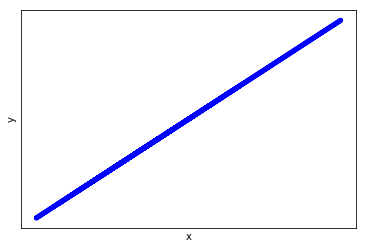

In [15]:
# Create linear regression object using scikit-learn
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(train_X, train_Y)

#plt.scatter(test_X, test_Y,  color='black')
plt.plot(test_X, regr.predict(test_X), color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Looking at the results for the linear regression you would assume that the x and y values in each of the datasets and the combined dataset as a whole are positive corrolated, meaning that as x increases y increases.

### 2.2. Descriptive Statistics for the Subsets

When we calculate the same descriptive statistics on each of the four subsets of the data we get almost identical results in most cases.

#### 2.2.1. Splitting the datasets

To perform these calculations we first need to split the dataframe into four seperate dataframe, one for each subset. We can do this by setting the "dataset" column as the index to allow for creation of subset dataframes.

In [16]:
anscombedf.set_index("dataset", inplace=True)


Group into invidual datasheet based on dataset column values.

In [17]:
Idf = anscombedf.loc["I"]
IIdf = anscombedf.loc["II"]
IIIdf = anscombedf.loc["III"]
IVdf = anscombedf.loc["IV"]

Display tables side by side.

In [18]:
# Function taken from: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [19]:
display_side_by_side(Idf,IIdf,IIIdf,IVdf)

,x,y
dataset,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


Looking at four subsets side by side does not tell us much other than the "x" values for subset IV are unusual and contain one outlier.

#### 2.2.2 Descriptive Statistics Compared

**Pandas df.describe**

In [20]:
display_side_by_side(Idf.describe(),IIdf.describe(),IIIdf.describe(),IVdf.describe())

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


Again there is nothing here that would tell us that the datasets would look drastically different when graphed. 

Given that the standard deviation and mean are almost identical for each dataset for x and y, the probabilty distribution functions would appear the same as for the dataset as a whole when charted.

Mix and max values are also not wildly different, except for maybe IV's unusually high max value, which would again indicate the presence of a single outlier.

**Mode**

In [21]:
display_side_by_side(Idf.mode(axis=0),IIdf.mode(axis=0),IIIdf.mode(axis=0),IVdf.mode(axis=0))

,x,y
0,4.0,4.26
1,5.0,4.82
2,6.0,5.68
3,7.0,6.95
4,8.0,7.24
5,9.0,7.58
6,10.0,8.04
7,11.0,8.33
8,12.0,8.81
9,13.0,9.96


When looking each of the four sets independantly it is impossible to find a mode for the sets except the mode of "x" in IV. This doesn't tell us much other than to enforce the impression that IV is different to the other datasets.

**Median**

In [22]:
med_Idf = pd.DataFrame(Idf.median())
med_IIdf = pd.DataFrame(IIdf.median())
med_IIIdf = pd.DataFrame(IIIdf.median())
med_IVdf = pd.DataFrame(IVdf.median())
display_side_by_side(med_Idf,med_IIdf,med_IIIdf,med_IVdf)

,0
x,9.00
y,7.58
,0
x,9.00
y,8.14
,0
x,9.00
y,7.11
,0
x,8.00


Median point values are very similar for each set and are again close to the mean for each of the sets. This would lead us to believe that each of the datasets are also normally distributed.

**Kurtosis**

In [23]:
kurt_Idf = pd.DataFrame(Idf.kurtosis())
kurt_IIdf = pd.DataFrame(IIdf.kurtosis())
kurt_IIIdf = pd.DataFrame(IIIdf.kurtosis())
kurt_IVdf = pd.DataFrame(IVdf.kurtosis())
display_side_by_side(kurt_Idf,kurt_IIdf,kurt_IIIdf,kurt_IVdf)

,0
x,-1.200000
y,-0.534898
,0
x,-1.200000
y,0.846123
,0
x,-1.200000
y,4.384089
,0
x,11.000000


One descriptive statistic that shows a clear difference between the fours sets is the kurtosis for the distribution of the X and Y values. The X values for sets I, II, and III are identical, but IV is extremely high in comparison indicating that numbers are tightly grouped around the mean whereas the others are flatter. 

The Y values differ greatly from one set to the next indicating each of the distribution will appear very differntly when graphed.

**Skew**

In [24]:
skew_Idf = pd.DataFrame(Idf.skew())
skew_IIdf = pd.DataFrame(IIdf.skew())
skew_IIIdf = pd.DataFrame(IIIdf.skew())
skew_IVdf = pd.DataFrame(IVdf.skew())
display_side_by_side(skew_Idf, skew_IIdf, skew_IIIdf, skew_IVdf)

,0
x,0.000000
y,-0.065036
,0
x,0.000000
y,-1.315798
,0
x,0.000000
y,1.855495
,0
x,3.316625


Again there are signs of major difference between the datasets when we look at the skew. Distribution for the X values for the first three sets would appear to be perfectly symetrical whereas set IV is strongly positively skewed which is accounted for by the outlier we noted earlier.

The skew for the Y values also shift from almost 0 in set I to strongly negative in set II, and then strongly positive in sets III and IV.

**Corrolation**

In [25]:
display_side_by_side(Idf.corr(),IIdf.corr(),IIIdf.corr(),IVdf.corr())

,x,y
x,1.000000,0.816421
y,0.816421,1.000000
,x,y
x,1.000000,0.816237
y,0.816237,1.000000
,x,y
x,1.000000,0.816287
y,0.816287,1.000000
,x,y
x,1.000000,0.816521


Corrolation coefficients for each of subsets are identical to eachother and the combined dataset as a whole. As with the main dataset this would lead us to believe that vales for x and y increase in tandem.

Since the means, standard deviation, and corrolation coefficients are identical to the combined dataset, performing linear regression would result in the same results as the main dataset. I will show this when graphing the datasets below.

### 2.3. Summary

Of all the descriptive statistics only the skew and kurtosis give us an indication that there is any major differece between the four datasets. These results tell us that there may be outiers in the datasets that are "throwing off" the other descriptive statistics. Graphing the data in the next section will reveal the differences between the datasets.

## 3.0 Plotting Dataset to Show Differences

### 3.1. Scatterplots with Linear Regression Overlayed

Seaborn's "lmplot" gives us a quick and easy way of plotting the four datasets. This function combines a *"regplot()"* and *"FacetGrid()"* to present the data in the manner that Anscombe presented them in his original article.

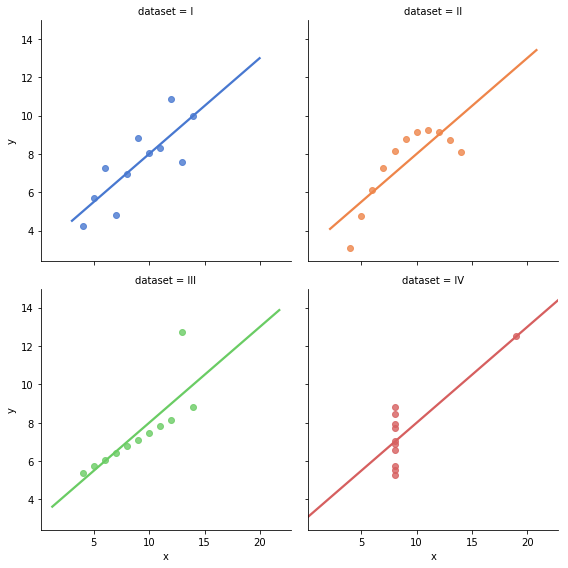

In [26]:
reset = anscombedf.reset_index()
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=reset,
           col_wrap=2, ci=None, palette="muted", height=4)

Plotting the dataset shows each has the same line of best fit, in three of the four cases, outliers are influencing the line to give us a false impression.

**Set I:**
In this set the datapoints do seem to be genuinely positively corrolated with some slightly above and below the line. In this case the descriptive statistics hold up in comparison to the graphed data.

**Set II:**
This data is arranged in a curve rather than in a linear relationship. This contradicts the corrolation coefficient we calculated above which showed a strong positive corrolation (0.82) as with the other datasets. 

**Set III:**
This set shows a perfect corrolation, but the line has been shifted down to the same corrolation as the other datasets due to the presence of an outlier.

**Set IV:**
When we look at the graph for this set we can see that there is obviously no linear relationship and that there is a clear outlier that we noted when calculating our descriptive statistics.

### 3.2. Pairplots

Seaborns *"pairplot"* give us a combination of scatterplots with regression lines and historgrams of the X and Y values for each dataset. Which again show that the four sets have no relationship to eachother despite having similar descriptive statistics.

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


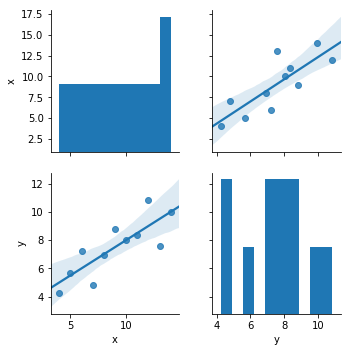

In [27]:
Idfpairplot = sns.pairplot(Idf, kind="reg")
plt.show(Idfpairplot)

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


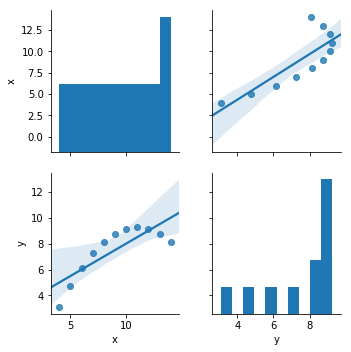

In [28]:
IIdfpairplot = sns.pairplot(IIdf, kind="reg")
plt.show(IIdfpairplot)

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


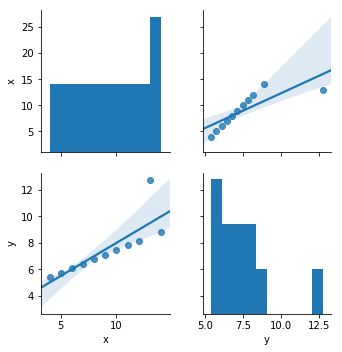

In [29]:
IIIdfpairplot = sns.pairplot(IIIdf, kind="reg")
plt.show(IIIdfpairplot)

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


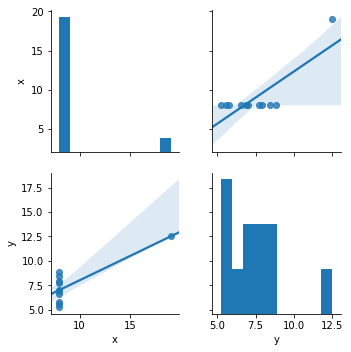

In [30]:
IVdfpairplot = sns.pairplot(IVdf, kind="reg")
plt.show(IVdfpairplot)

### 3.3. Distribution skews

#### 3.3.1. Distribution of X Values

**Distribution of X values for I, II, & III**

X values are identical for sets I, II, and III and show a normal distribution that is perfectly symetrical.

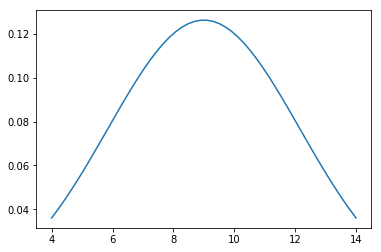

In [31]:
norm_IX = Idf["x"].values
skewIX = np.linspace(min(norm_IX), max(norm_IX))
plt.plot(skewIX, skewnorm.pdf(skewIX, *skewnorm.fit(norm_IX))) 

**Distribution of X values for IV**

In contrast, IV's x values are extremly positively skewed due to the combination of the cluster of values at the mean and the single outlier of much higher value.

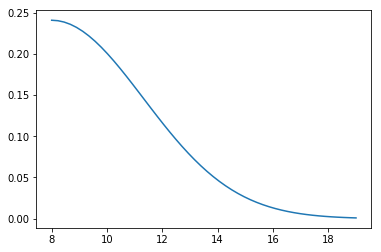

In [32]:
norm_IVX = IVdf["x"].values
skewIVX = np.linspace(min(norm_IVX), max(norm_IVX))
plt.plot(skewIVX, skewnorm.pdf(skewIVX, *skewnorm.fit(norm_IVX))) 

#### 3.3.2. Distribution of Y Values

When looking at the distribution for the Y values, the distribution for set I has almost no skew, II is strongly negatively skewed while III and IV are both strongly positively skewed.

**Set I**

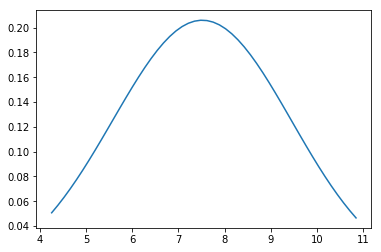

In [33]:
norm_IY = Idf["y"].values
skewIY = np.linspace(min(norm_IY), max(norm_IY))
plt.plot(skewIY, skewnorm.pdf(skewIY, *skewnorm.fit(norm_IY))) 

**Set II**

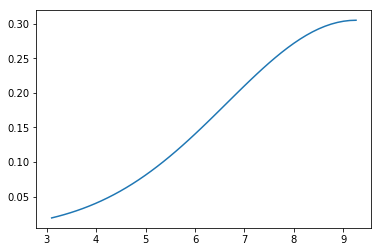

In [34]:
norm_IIY = IIdf["y"].values
skewIIY = np.linspace(min(norm_IIY), max(norm_IIY))
plt.plot(skewIIY, skewnorm.pdf(skewIIY, *skewnorm.fit(norm_IIY))) 

**Set III**

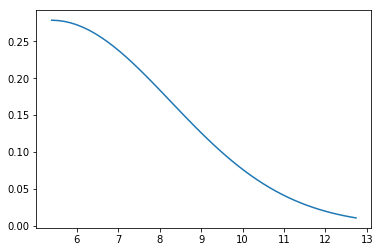

In [35]:
norm_IIIY = IIIdf["y"].values
skewIIIY = np.linspace(min(norm_IIIY), max(norm_IIIY))
plt.plot(skewIIIY, skewnorm.pdf(skewIIIY, *skewnorm.fit(norm_IIIY))) 

**Set IV**

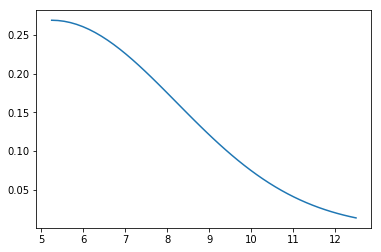

In [36]:
norm_IVY = IVdf["y"].values
skewIVY = np.linspace(min(norm_IVY), max(norm_IVY))
plt.plot(skewIVY, skewnorm.pdf(skewIVY, *skewnorm.fit(norm_IVY))) 

#### 3.3.3. Summary of Skews

In summary, from looking at the descriptive statistics and graphs for the X values, you might assume that sets I, II, and III were in some way related, but they are in no way similar to set IV. Looking at the Y values, the skew figures would indicate that the datasets are not related and this bourne out when graphed.

Each of the graphed distributions also match up well with the histograms in the pairplots of each set.

## 4.0. Why is the Dataset Interesting?

This Dataset is interesting for several reasons:

1. It shows us that summary statistics can sometimes be misleading.
2. It shows us the value of graphing data when exploring a dataset.
3. It shows us the effect outliers can have on a dataset.
4. It serves as a reminder of how lucky we are to have such a variety of data visualisation tools available to us.



### 4.1. Summary / Descriptive Statistics can be Misleading

As we have already discussed and shown above, the four datasets have identical means and standard deviations for X and Y, corrolation coefficients, and regression coefficients. However, this is a pure coincidence (a planned one) with the datasets' identical means and standard deviations driving the results for the other two results. Once graphed it is obvious that the four datasets a very different and have no relationship to eachother.

### 4.2. The importance of Graphing Data when Exploring a Dataset

If we had been presented with this dataset with no context it would have been very easy for us to set off down a road to nowhere under the assumption that the four sets were somehow related. If we had begun the process by graphing the datasets, even with a basic scatterplot it would be immediately obvious that we should treat them as independent datasets with different approaches and methods of analysis for each of them. For example, set II shows some kind of evidence of a relationship between X and Y, but it isn't a linear relationship. We could try could parabolic regression instead for example.

### 4.3. The Effect of Outliers on a Dataset

This is probably the lesson that will have the most real world application. Sets III and IV both have outliers that skew the results. In set III a single outlier prevents that dataset from having a perfectly linear relationship between X and Y. If we had graphed this dataset first we might have been able to note the outlier and decide how to deal with it. In his article Anscombe argues that the data should be graphed twice; once with the outlier included and one with it removed. In set IV the outlier is more extreme and completely alters the descriptive statistics for the dataset. In these cases the Anscombe says that maybe the datapoint should be removed, investigated for being a mistake, or included with a warning of the critical role it played. Outliers are encountered in almost all real world statically data and this example highlight the importance of identifying them in the early stages of the analysis and deciding how to deal with them.

### 4.4. Usefulness of Data Visualistion Tools

The last few line of Anscombe's original article states *"The user is not showered with graphical displays. He can get them only with trouble, cunning and a fighting spirit. It's time that was change"*. Back in 1973 the vast majority of statisticians would have to calculate the statistics and plot datasets by hand. Back then may have been some excuse for not doing both. Today there are ubiquitous tools such as Microsoft Excel that allow anyone to graph data relatively easily as long as they have the will to do so. Modern Business Intelligence like Microsoft Power BI and Tableua allow you to quickly load, manipulate, and drill down into  data in order to investigate in further. Then there are the statistical and data manipulation packages in programming languages like Python and R that allow you to go even further. Graphing complex data is now relatively simple and can allow a non-expert in statistics to identify a problem with a dataset easily before formulating an approach for investigating it.